# Data processing

In this notebook, I am loading a list of molecules I obtained from ChEMBL and processing them to make sure I have:
- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [24]:
#imports and paths
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = r"D:\data\chembl_33_chemreps.txt"
output = r"D:\data\output.json"

The data was dowmloaded from the ChEMBL dataset.Originally it was in .txt form with \t seperator so we can use read_table() function.

In [3]:
# In this codeblock I will load the data from the /data folder to a Pandas dataframe and understand which headers it has
df = pd.read_table(data,sep = '\t')

In [4]:
df.head()

,chembl_id,canonical_smiles,standard_inchi,standard_inchi_key
0,CHEMBL153534,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,InChI=1S/C10H13N5S/c1-6-3-7(4-15(6)2)8-5-16-10...,MFRNFCWYPYSFQQ-UHFFFAOYSA-N
1,CHEMBL440060,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,InChI=1S/C123H212N44O34S/c1-19-63(12)96(164-11...,RSEQNZQKBMRQNM-VRGFNVLHSA-N
2,CHEMBL440245,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,InChI=1S/C160H268N50O41/c1-23-27-41-95-134(228...,FTKBTEIKPOYCEX-OZSLQWTKSA-N
3,CHEMBL440249,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,InChI=1S/C124H154ClN21O39/c1-57(2)48-81-112(17...,UYSXXKGACMHPIM-KFGDMSGDSA-N
4,CHEMBL405398,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,InChI=1S/C19H21BrN6O/c20-15-2-1-3-17(18(15)22-...,VDSXZXJEWIWBCG-UHFFFAOYSA-N


In [5]:
df.shape

(2372674, 4)

In [6]:
df = df.head(1000)
df.shape

(1000, 4)

Since we need only 1000 molecules we can just take the first 1000 entries.

We just need smiles and inchikey so we'll remove the remaining columns.

In [ ]:
df = df[['canonical_smiles','standard_inchi_key']]

Now we can save the dataframe as a .csv file to use with Ersilia.

In [10]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns. 
# All data will be saved with informative names in the /data folder
df.to_csv('input.csv',index = False)

# Model Bias Evaluation

Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space. The output for this model is probability of hERG bloackage.

The output was stored in json file so we will convert into dataframe using read_json()

In [4]:
# In this codeblock I will load the predictions I've run on Ersilia and saved in the /data folder
pred = pd.read_json(output)
pred1 = pd.json_normalize(pred['input'])
pred2 = pd.json_normalize(pred['output'])

In [5]:
pred.head()

,input,output
0,"{'key': 'MFRNFCWYPYSFQQ-UHFFFAOYSA-N', 'input'...",{'outcome': 0.19174917042255402}
1,"{'key': 'RSEQNZQKBMRQNM-VRGFNVLHSA-N', 'input'...",{'outcome': 0.361221134662628}
2,"{'key': 'FTKBTEIKPOYCEX-OZSLQWTKSA-N', 'input'...",{'outcome': [0.444719471947194]}
3,"{'key': 'UYSXXKGACMHPIM-KFGDMSGDSA-N', 'input'...",{'outcome': [0.505775577557755]}
4,"{'key': 'VDSXZXJEWIWBCG-UHFFFAOYSA-N', 'input'...",{'outcome': [0.551980198019802]}


In [6]:
pred = pd.merge(pred1,pred2,left_index=True, right_index=True, how='inner')

In [7]:
pred.head()

,key,input,text,outcome
0,MFRNFCWYPYSFQQ-UHFFFAOYSA-N,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,0.191749
1,RSEQNZQKBMRQNM-VRGFNVLHSA-N,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,0.361221
2,FTKBTEIKPOYCEX-OZSLQWTKSA-N,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,[0.444719471947194]
3,UYSXXKGACMHPIM-KFGDMSGDSA-N,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,[0.505775577557755]
4,VDSXZXJEWIWBCG-UHFFFAOYSA-N,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,[0.551980198019802]


In [8]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      1000 non-null   object
 1   input    1000 non-null   object
 2   text     1000 non-null   object
 3   outcome  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [17]:
pred['outcome'].isnull().sum()

4

In [20]:
pred.dropna(subset=['outcome'], inplace=True)

The outcome column is object type but we need to convert it into numerical data type so we can make visualizations. Also there are some brackets [] which need to be stripped

In [43]:
pred['outcome'] = pred['outcome'].astype(str)
pred['outcome'] = pred['outcome'].str.strip('[]')
pred['outcome'] = pd.to_numeric(pred['outcome'],errors='coerce')

# Visualizations

## Checking the probability distribution

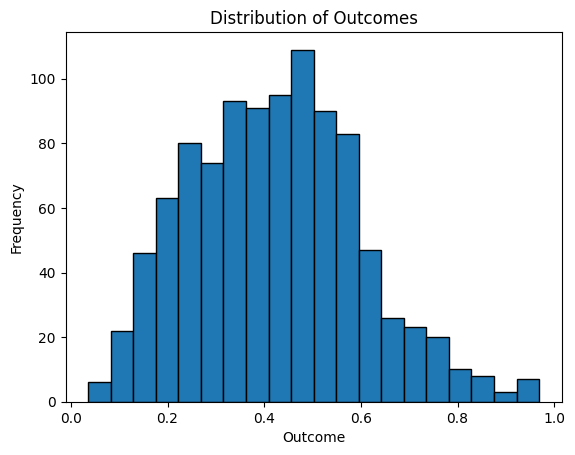

In [97]:
plt.hist(pred['outcome'],bins = 20,edgecolor='black')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Outcomes')
plt.savefig('hist.png')
plt.show();

So we can see most compounds have probability around 0.5

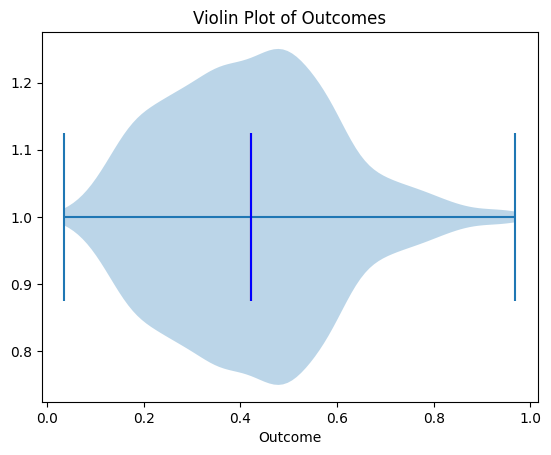

In [98]:
viol = plt.violinplot(pred['outcome'], vert=False,showmeans=True,showmedians=True)
viol['cmedians'].set_color('blue') 
viol['cmeans'].set_color('red')
plt.xlabel('Outcome')
plt.title('Violin Plot of Outcomes')
plt.savefig('viol.png')
plt.show()

The mean and median of the data are same! Thus the probablity distribution for some random 1000 compounds is symmetric which seems unlikely.

## Checking the lowest and highest probabilities 

In [67]:
pred_sorted = pred.sort_values(by='outcome')
top_5 = pred_sorted.tail(5)
lowest_5 = pred_sorted.head(5)

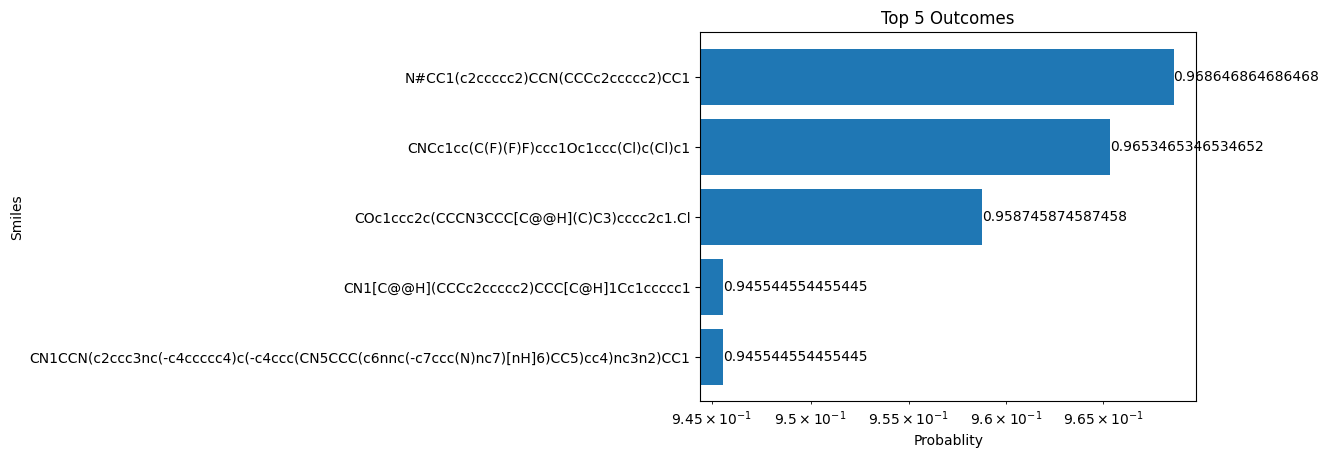

In [99]:
plt.barh(top_5['input'], top_5['outcome'])
for index, value in enumerate(top_5['outcome']):
    plt.text(value, index, f'{value:}', ha='left', va='center')
plt.xlabel('Probablity')
plt.ylabel('Smiles')
plt.xscale('log')  # Plotted on logarithmic scale to make difference look more clear
plt.title('Top 5 Outcomes')
plt.savefig('top5.png')
plt.show();

Surprisingly the 4th and 5th top probability are the same which could show that model is not able to differentiate between the two inputs

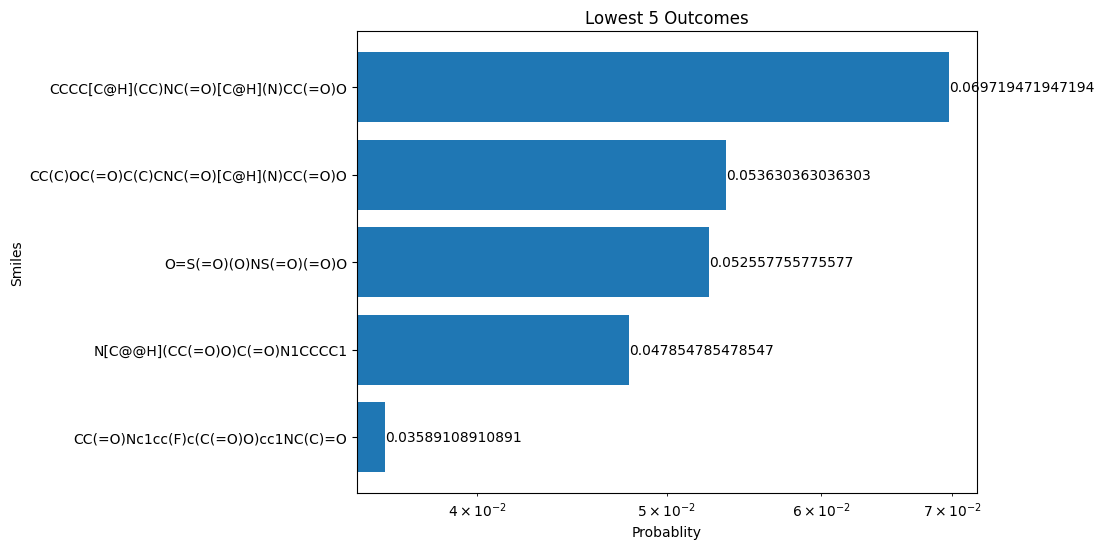

In [100]:
plt.figure(figsize=(8, 6))
plt.barh(lowest_5['input'], lowest_5['outcome'])
for index, value in enumerate(lowest_5['outcome']):
    plt.text(value, index, f'{value:}', ha='left', va='center')
plt.xlabel('Probablity')
plt.ylabel('Smiles')
plt.xscale('log')  # Plotted on logarithmic scale to make difference look more clear
plt.title('Lowest 5 Outcomes')
plt.savefig('low5.png')
plt.show()


## Checking percentage of blockers and non-blockers

The paper defined inhibation of 80% to define hERG blockers. Using the same threshold we check number of blckers vs non blockers

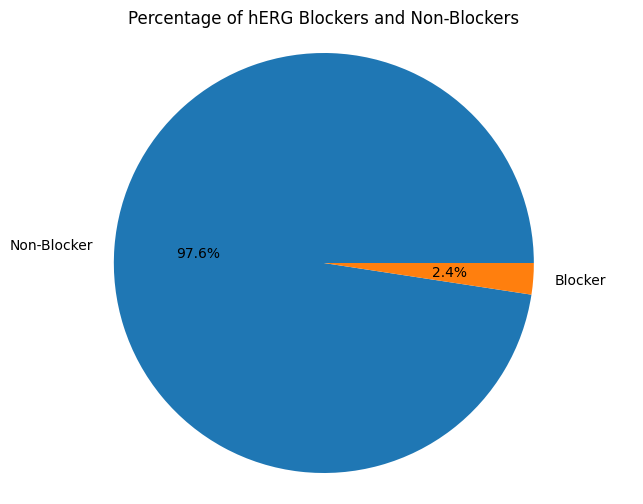

In [101]:
value_counts = pred['outcome'].apply(lambda x: 'Blocker' if x >= 0.8 else 'Non-Blocker').value_counts()
total_compounds = 1000
percentage_blockers = (value_counts.get('Blocker', 0) / total_compounds) * 100
percentage_non_blockers = (value_counts.get('Non-Blocker', 0) / total_compounds) * 100
plt.figure(figsize=(8, 6))
value_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of hERG Blockers and Non-Blockers')
plt.ylabel('') 
plt.axis('equal')
plt.savefig('blockVSnon.png')
plt.show()

The no of non blockers is very less as compared to the blockers